<a href="https://colab.research.google.com/github/MaryAdewunmi/Sports-betting/blob/main/Predicting_scores_using_Ridge_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge



In [3]:
from google.colab import files
uploaded = files.upload()

Saving Hockeygames.xlsx to Hockeygames.xlsx


In [4]:
df = pd.read_excel('Hockeygames.xlsx',sheet_name = 'Sheet1',header = 0)


***Data Exploration***

In [5]:
df.head()

,Date,Visitor,VisitorG,Home,HomeG
0,2019-10-02,Vancouver Canucks,2,Edmonton Oilers,3
1,2019-10-02,Washington Capitals,3,St. Louis Blues,2
2,2019-10-02,Ottawa Senators,3,Toronto Maple Leafs,5
3,2019-10-02,San Jose Sharks,1,Vegas Golden Knights,4
4,2019-10-03,Arizona Coyotes,1,Anaheim Ducks,2


In [6]:

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [7]:
df.index 

RangeIndex(start=0, stop=640, step=1)

In [8]:
df.index +=1

In [9]:
df.index

RangeIndex(start=1, stop=641, step=1)

In [10]:
df.head()

,Date,Visitor,VisitorG,Home,HomeG
1,2019-10-02,Vancouver Canucks,2,Edmonton Oilers,3
2,2019-10-02,Washington Capitals,3,St. Louis Blues,2
3,2019-10-02,Ottawa Senators,3,Toronto Maple Leafs,5
4,2019-10-02,San Jose Sharks,1,Vegas Golden Knights,4
5,2019-10-03,Arizona Coyotes,1,Anaheim Ducks,2


In [11]:
df['g_diff'] = df['HomeG'] - df['VisitorG']

In [12]:
df['g_diff'].head()

1    1
2   -1
3    2
4    3
5    1
Name: g_diff, dtype: int64

In [13]:
# create new vcolumn to show home team win or loss result
df['home_win'] = np.where(df['g_diff'] > 0, 1, 0)
df['home_loss'] = np.where(df['g_diff'] < 0, 1, 0)

In [14]:
df.head()

,Date,Visitor,VisitorG,Home,HomeG,g_diff,home_win,home_loss
1,2019-10-02,Vancouver Canucks,2,Edmonton Oilers,3,1,1,0
2,2019-10-02,Washington Capitals,3,St. Louis Blues,2,-1,0,1
3,2019-10-02,Ottawa Senators,3,Toronto Maple Leafs,5,2,1,0
4,2019-10-02,San Jose Sharks,1,Vegas Golden Knights,4,3,1,0
5,2019-10-03,Arizona Coyotes,1,Anaheim Ducks,2,1,1,0


In [15]:
df_Visitor = pd.get_dummies(df['Visitor'], dtype=np.int64)
df_Home = pd.get_dummies(df['Home'], dtype=np.int64)

In [16]:
df_Visitor.head()

,Anaheim Ducks,Arizona Coyotes,Boston Bruins,Buffalo Sabres,Calgary Flames,Carolina Hurricanes,Chicago Blackhawks,Colorado Avalanche,Columbus Blue Jackets,Dallas Stars,Detroit Red Wings,Edmonton Oilers,Florida Panthers,Los Angeles Kings,Minnesota Wild,Montreal Canadiens,Nashville Predators,New Jersey Devils,New York Islanders,New York Rangers,Ottawa Senators,Philadelphia Flyers,Pittsburgh Penguins,San Jose Sharks,St. Louis Blues,Tampa Bay Lightning,Toronto Maple Leafs,Vancouver Canucks,Vegas Golden Knights,Washington Capitals,Winnipeg Jets
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
df_Home.head()

,Anaheim Ducks,Arizona Coyotes,Boston Bruins,Buffalo Sabres,Calgary Flames,Carolina Hurricanes,Chicago Blackhawks,Colorado Avalanche,Columbus Blue Jackets,Dallas Stars,Detroit Red Wings,Edmonton Oilers,Florida Panthers,Los Angeles Kings,Minnesota Wild,Montreal Canadiens,Nashville Predators,New Jersey Devils,New York Islanders,New York Rangers,Ottawa Senators,Philadelphia Flyers,Pittsburgh Penguins,San Jose Sharks,St. Louis Blues,Tampa Bay Lightning,Toronto Maple Leafs,Vancouver Canucks,Vegas Golden Knights,Washington Capitals,Winnipeg Jets
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# subtract home from visitor
df_model = df_Home.sub(df_Visitor) 
df_model['g_diff'] = df['g_diff']

In [19]:
df_train = df_model 

lr = Ridge(alpha=0.001) 
X = df_train.drop(['g_diff'], axis=1)
y = df_train['g_diff']

lr.fit(X, y)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [20]:
df_ratings = pd.DataFrame(data={'team': X.columns, 'rating': lr.coef_})
df_ratings

,team,rating
0,Anaheim Ducks,-0.576006
1,Arizona Coyotes,0.173415
2,Boston Bruins,0.723737
3,Buffalo Sabres,-0.190159
4,Calgary Flames,-0.212756
5,Carolina Hurricanes,0.494470
6,Chicago Blackhawks,-0.272586
7,Colorado Avalanche,0.813188
8,Columbus Blue Jackets,-0.091216
9,Dallas Stars,0.263610


In [21]:
import plotly.express as px
data = df1
# Use directly Columns as argument. You can use tab completion for this!
fig = px.scatter(df1, x=df1.Player, y=df1.Team, size=df1.Win)
fig.show()

NameError: ignored

In [ ]:
import plotly.express as px
data = df_ratings
# Use directly Columns as argument. You can use tab completion for this!
fig = px.scatter(df_ratings, x=df_ratings.team, y=df_ratings.rating)
fig.show()

Team Colorado Avalanche has the highest ratings

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler


In [ ]:
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm"

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

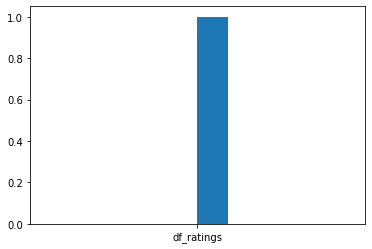

In [30]:
import numpy as np
plt.hist('df_ratings')

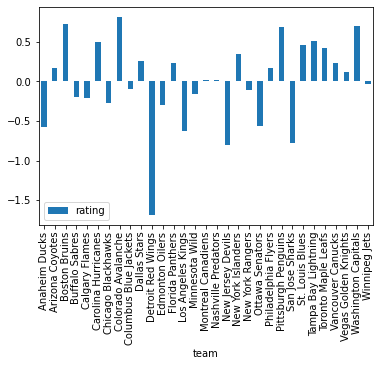

In [35]:
df_ratings.plot(kind='bar', x = 'team', y = 'rating')

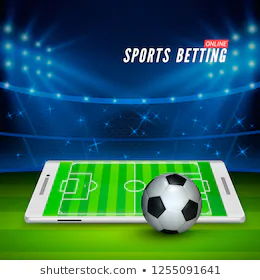

***This Notebook is authored by Mary Adewunmi***